In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import os
import cv2
import pathlib

In [3]:
pip install opencv-python



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


from sklearn.model_selection import train_test_split


In [12]:
train = pd.read_csv('./Train.csv')

In [13]:
train.shape

(39209, 8)

In [14]:
X, y = [],[]

for i, row in train.iterrows():
    img_path = row['Path']
    image = cv2.imread(img_path)
    image = cv2.resize(image,(32,32))
    X.append(image)
    y.append(row['ClassId'])

In [8]:
train.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [17]:
X= np.array(X)/255

In [18]:
from keras.utils import to_categorical

y = to_categorical(y)

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
)

In [22]:
model = Sequential()


In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D( 64 ,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D( 6128 ,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(43, activation='softmax'))


In [29]:
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [32]:
history = model.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs= 15)

Epoch 1/15


/Users/satenkarapetyan/Desktop/ML/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


821/821 ━━━━━━━━━━━━━━━━━━━━ 67s 81ms/step - accuracy: 0.3286 - loss: 2.3909 - val_accuracy: 0.9068 - val_loss: 0.2954
Epoch 2/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 68s 83ms/step - accuracy: 0.9016 - loss: 0.3208 - val_accuracy: 0.9825 - val_loss: 0.0586
Epoch 3/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.9561 - loss: 0.1488 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 4/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 70s 85ms/step - accuracy: 0.9709 - loss: 0.1006 - val_accuracy: 0.9851 - val_loss: 0.0469
Epoch 5/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 71s 87ms/step - accuracy: 0.9726 - loss: 0.0869 - val_accuracy: 0.9949 - val_loss: 0.0178
Epoch 6/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 76s 93ms/step - accuracy: 0.9804 - loss: 0.0703 - val_accuracy: 0.9860 - val_loss: 0.0515
Epoch 7/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 77s 94ms/step - accuracy: 0.9794 - loss: 0.0749 - val_accuracy: 0.9957 - val_loss: 0.0138
Epoch 8/15
821/821 ━━━━━━━━━━━━━━━━━━━━ 77s 94ms/step - accuracy: 0.9814 - loss: 0.0683 - val_accurac

Text(0.5, 1.0, 'Model ACC')

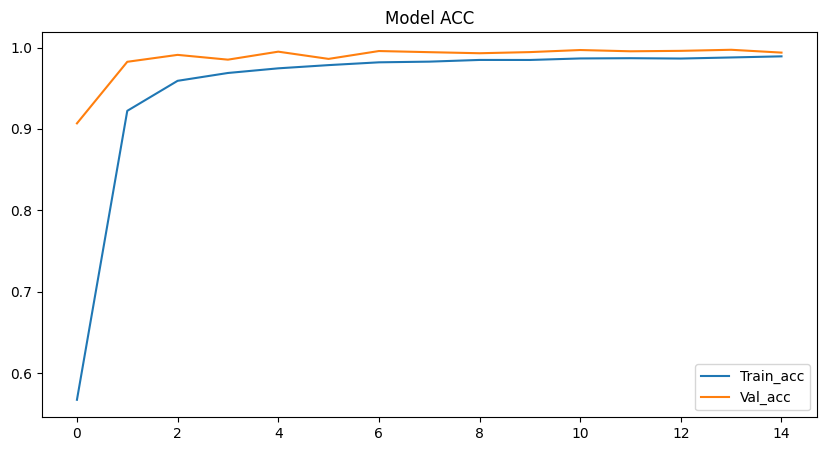

In [35]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label ='Train_acc')
plt.plot(history.history['val_accuracy'],label='Val_acc')
plt.legend()
plt.title('Model ACC')

Text(0.5, 1.0, 'Model loss')

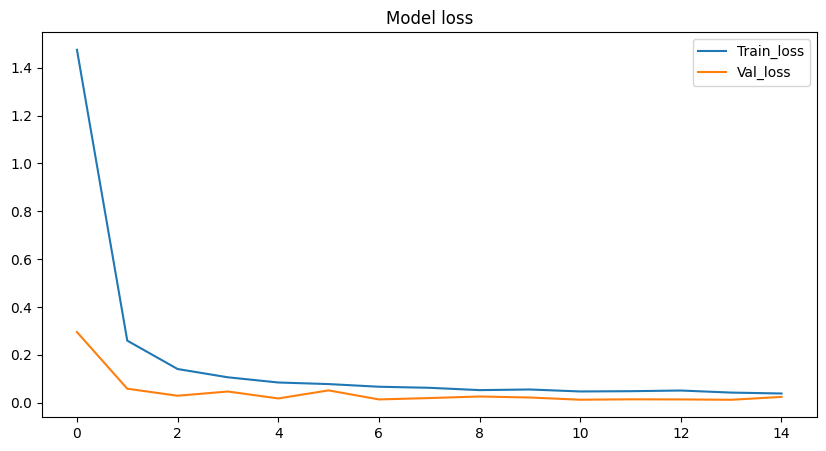

In [36]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label ='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.title('Model loss')